<a href="https://colab.research.google.com/github/databyhuseyn/DeepLearning/blob/main/Face_Verification_with_Siamese_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Setup

# 1.1 Install Dependencies

In [ ]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 20.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  

# 1.2 Import Dependencies

In [ ]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#plt.imshow??

In [ ]:
# Import tensorflow dependencies
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

# 1.3 Set GPU Growth

In [ ]:
# Avid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
gpus

[]

# 1.4 Create Folder Structures

In [ ]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [ ]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# 2. Collect Positives and Anchors

# 2.1 Untar Labelled Faces in the Wild Dataset

In [ ]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz

In [ ]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
  for filename in os.listdir(os.path.join('lfw', directory)):
    EX_PATH = os.path.join('lfw', directory, filename)
    NEW_PATH = os.path.join(NEG_PATH, filename)
    os.replace(EX_PATH, NEW_PATH)

In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

--2024-08-21 11:03:03--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-08-21 11:03:03 (18.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import walk_through_dir, unzip_data

In [ ]:
walk_through_dir('/content/data/negative')

There are 0 directories and 13233 images in '/content/data/negative'.


# 2.2 Collect Positive and Anchor Classes

In [ ]:
# Import uuid library to generate unique image names
import uuid

In [ ]:
### Use this on your local machine, because Google Colab doesn't have the access to your webcam

# Establish a connection to the webcam
cap = cv2.VideoCapture(5)
while cap.isOpened():
  ret, frame = cap.read()

  # Cut down frame to 250x250px
  frame = frame[120:120+250, 200:200+250, :]

  # Collect anchors
  if cv2.waitKey(1) & 0XFF == ord('a'):
    # Create the unique file path
    imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
    # Write out anchor name
    cv2.imwrite(imgname, frame)

  # Collect positives
  if cv2.waitKey(1) & 0XFF == ord('p'):
    # Create the unique file path
    imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
    # Write out anchor name
    cv2.imwrite(imgname, frame)

  # Show image back to screen
  cv2.imshow('Image Collection', frame)

  # Breaking gracefully
  if cv2.waitKey(1) & 0XFF == ord('q'):
    break

# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [ ]:
!unzip /content/facerecognition.zip

Archive:  /content/facerecognition.zip
   creating: positive/
  inflating: positive/3985d6df-5f14-11ef-8158-9828a6461770.jpg  
  inflating: positive/399fc571-5f14-11ef-bfaa-9828a6461770.jpg  
  inflating: positive/39ae16f6-5f14-11ef-8e27-9828a6461770.jpg  
  inflating: positive/39bc5e44-5f14-11ef-ae1a-9828a6461770.jpg  
  inflating: positive/39c35fd8-5f14-11ef-8705-9828a6461770.jpg  
  inflating: positive/39db13ff-5f14-11ef-9a3f-9828a6461770.jpg  
  inflating: positive/39ee0020-5f14-11ef-90de-9828a6461770.jpg  
  inflating: positive/3a0d060c-5f14-11ef-b0a5-9828a6461770.jpg  
  inflating: positive/3a1ac8f1-5f14-11ef-9080-9828a6461770.jpg  
  inflating: positive/3a290ffe-5f14-11ef-9857-9828a6461770.jpg  
  inflating: positive/3a4d2666-5f14-11ef-8dc5-9828a6461770.jpg  
  inflating: positive/3a5b7485-5f14-11ef-8002-9828a6461770.jpg  
  inflating: positive/3a699ce4-5f14-11ef-90df-9828a6461770.jpg  
  inflating: positive/3a7810a3-5f14-11ef-908f-9828a6461770.jpg  
  inflating: positive/3a976a

In [ ]:
# Move Poisitve and positive Images to the following repository data/positive and data/positive
for filename in os.listdir('anchor'): # Iterate over files directly in 'positive'
  EX_PATH = os.path.join('anchor', filename)
  NEW_PATH = os.path.join(ANC_PATH, filename)
  os.replace(EX_PATH, NEW_PATH)

for filename in os.listdir('positive'): # Iterate over files directly in 'positive'
  EX_PATH = os.path.join('positive', filename)
  NEW_PATH = os.path.join(POS_PATH, filename)
  os.replace(EX_PATH, NEW_PATH)

In [ ]:
walk_through_dir('/content/data/positive'), walk_through_dir('/content/data/anchor')

There are 0 directories and 435 images in '/content/data/positive'.
There are 0 directories and 596 images in '/content/data/anchor'.


(None, None)

# 3. Load and Preprocess Images

# 3.1 Get Image Directories

In [ ]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)

In [ ]:
dir_test = anchor.as_numpy_iterator()
dir_test.next()

b'data/anchor/2e273d31-5f14-11ef-bf52-9828a6461770.jpg'

# 3.2 Preprocessing - Scale and Resize

In [ ]:
def preprocess(file_path):

  # Read in image from file path
  byte_img = tf.io.read_file(file_path)
  # Load in the image
  img = tf.io.decode_jpeg(byte_img)

  # Preprocessing steps - resizing the image to be 100x100x3
  img = tf.image.resize(img, (100, 100))
  # Scale image to be between 0 and 1
  img = img / 255.0


  return img

In [ ]:
img = preprocess('data/anchor/0c1b0a9b-5f14-11ef-8a7f-9828a6461770.jpg')
img

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.6044118 , 0.65539217, 0.6161765 ],
        [0.595098  , 0.6490196 , 0.60882354],
        [0.5872549 , 0.65      , 0.6009804 ],
        ...,
        [0.747549  , 0.8093137 , 0.7730392 ],
        [0.79044116, 0.85514706, 0.8306373 ],
        [0.7948529 , 0.86151963, 0.8379902 ]],

       [[0.6       , 0.65392154, 0.6137255 ],
        [0.59093136, 0.6463235 , 0.60563725],
        [0.59117645, 0.6517157 , 0.60294116],
        ...,
        [0.7468137 , 0.8063725 , 0.7708333 ],
        [0.75465685, 0.81789213, 0.79264706],
        [0.80220586, 0.8688725 , 0.8453431 ]],

       [[0.5926471 , 0.65539217, 0.6122549 ],
        [0.5872549 , 0.64705884, 0.60490197],
        [0.5992647 , 0.65318626, 0.60514706],
        ...,
        [0.7522059 , 0.80514705, 0.77181375],
        [0.74509805, 0.8039216 , 0.7764706 ],
        [0.7772059 , 0.84387255, 0.82034314]],

       ...,

       [[0.6098039 , 0.64117646, 0.5980392 ],
        [0.58

In [ ]:
# Values should be between 0 and 1 after scaling
img.numpy().min(), img.numpy().max()

(0.0754902, 0.8688725)

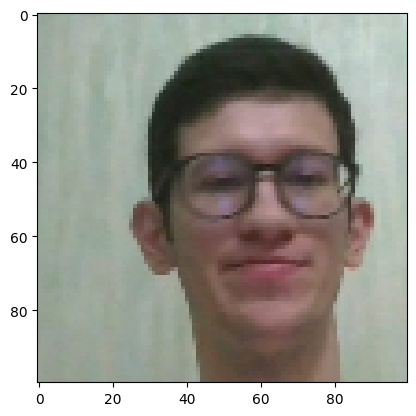

In [ ]:
plt.imshow(img)

# 3.3 Create Labelled Dataset

In [ ]:
# (anchor, positive)  =>  1,1,1,1,1
# (anchor, negative)  =>  0,0,0,0,0

In [ ]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [ ]:
samples = data.as_numpy_iterator()
samples.next()

(b'data/anchor/27d2278d-5f14-11ef-a1e8-9828a6461770.jpg',
 b'data/positive/3cec0d90-5f14-11ef-bd95-9828a6461770.jpg',
 1.0)

In [ ]:
example = samples.next()

# 3.4 Build Train and Test Partition

In [ ]:
def preprocess_twin(input_img, validation_img, label):
  return(preprocess(input_img), preprocess(validation_img), label)

In [ ]:
res = preprocess_twin(*example)

In [ ]:
res[0]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.58455884, 0.6512255 , 0.5884804 ],
        [0.57867646, 0.64240193, 0.5806373 ],
        [0.58431375, 0.6392157 , 0.5803922 ],
        ...,
        [0.73651963, 0.7992647 , 0.7561275 ],
        [0.7732843 , 0.8419118 , 0.79583335],
        [0.7764706 , 0.85490197, 0.8117647 ]],

       [[0.5879902 , 0.65367645, 0.59387255],
        [0.58210784, 0.64509803, 0.5860294 ],
        [0.58431375, 0.6392157 , 0.58235294],
        ...,
        [0.7379902 , 0.8007353 , 0.7585784 ],
        [0.75539213, 0.8240196 , 0.77818626],
        [0.7776961 , 0.8541667 , 0.810049  ]],

       [[0.589951  , 0.64681375, 0.59583336],
        [0.5875    , 0.64387256, 0.59289217],
        [0.59044117, 0.6453431 , 0.59436274],
        ...,
        [0.73137254, 0.7941176 , 0.75490195],
        [0.7379902 , 0.80220586, 0.7593137 ],
        [0.7639706 , 0.82867646, 0.78455883]],

       ...,

       [[0.59117645, 0.6166667 , 0.5686275 ],
        [0.58

Text(0.5, 1.0, 'Positive Image')

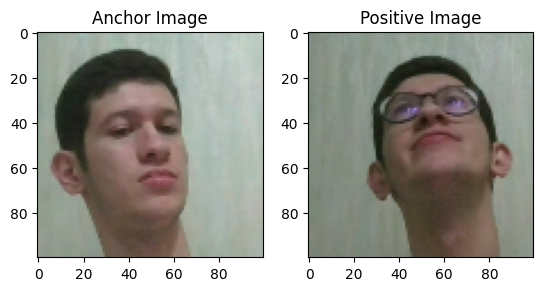

In [ ]:
plt.subplot(121)
plt.imshow(res[0])
plt.title("Anchor Image")
plt.subplot(122)
plt.imshow(res[1])
plt.title('Positive Image' if res[2] == 1 else 'Negative Image')


In [ ]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [ ]:
samples = data.as_numpy_iterator()
samples.next()

(array([[[0.54019606, 0.5990196 , 0.5715686 ],
         [0.5272059 , 0.5870098 , 0.5566176 ],
         [0.53161764, 0.59436274, 0.55514705],
         ...,
         [0.6848039 , 0.74558824, 0.71911764],
         [0.70465684, 0.7772059 , 0.7536765 ],
         [0.7110294 , 0.79338235, 0.76593137]],
 
        [[0.54607844, 0.60588235, 0.5754902 ],
         [0.532598  , 0.5953431 , 0.5561274 ],
         [0.52254903, 0.5852941 , 0.54313725],
         ...,
         [0.6791667 , 0.74289215, 0.7056373 ],
         [0.6877451 , 0.7588235 , 0.73333335],
         [0.70686275, 0.78137255, 0.75784314]],
 
        [[0.5468137 , 0.6095588 , 0.57034314],
         [0.54019606, 0.60294116, 0.5629902 ],
         [0.5257353 , 0.5884804 , 0.54558825],
         ...,
         [0.66887254, 0.73259807, 0.6938726 ],
         [0.6767157 , 0.74338233, 0.7120098 ],
         [0.7026961 , 0.7713235 , 0.7477941 ]],
 
        ...,
 
        [[0.5644608 , 0.589951  , 0.5497549 ],
         [0.5411765 , 0.56666666, 0.52450

In [ ]:
samp = samples.next()

In [ ]:
len(samp)

3

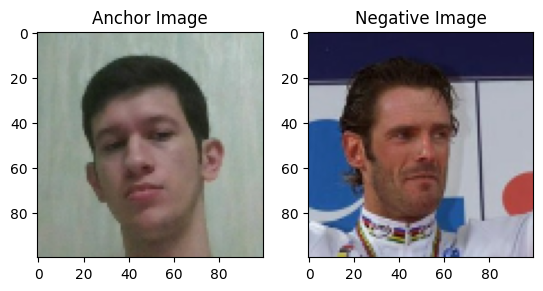

In [ ]:
plt.subplot(121)
plt.imshow(samp[0])
plt.title("Anchor Image")
plt.subplot(122)
plt.imshow(samp[1])
plt.title('Positive Image' if samp[2] == 1 else 'Negative Image');

In [ ]:
# Training partition
train_data = data.take(round(len(data)*0.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [ ]:
train_samples = train_data.as_numpy_iterator()

In [ ]:
train_sample = train_samples.next()

In [ ]:
len(train_sample)

3

In [ ]:
print(f'Length of each batch: {len(train_sample[0])}')

Length of each batch: 16


In [ ]:
# Testing partition
test_data = data.skip(round(len(data) * 0.7))
test_data = test_data.take(round(len(data) * 0.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Engineering

# 4.1 Build Embedding Layer

In [ ]:
def make_embedding():
  inp = Input(shape=(100, 100, 3), name='input_image')

  # First Block
  c1 = Conv2D(filters=64, kernel_size=(10, 10), activation='relu', kernel_initializer='he_normal')(inp)
  m1 = MaxPooling2D(pool_size=(2, 2), padding='same')(c1)

  # Second Block
  c2 = Conv2D(filters=128, kernel_size=(7, 7), activation='relu', kernel_initializer='he_normal')(m1)
  m2 = MaxPooling2D(pool_size=(2, 2), padding='same')(c2)

  # Third Block
  c3 = Conv2D(filters=128, kernel_size=(4, 4), activation='relu', kernel_initializer='he_normal')(m2)
  m3 = MaxPooling2D(pool_size=(2, 2), padding='same')(c3)

  # Final Ebedding Block
  c4 = Conv2D(filters=256, kernel_size=(4, 4), activation='relu', kernel_initializer='he_normal')(m3)
  f1 = Flatten()(c4)
  d1 = Dense(4096, activation='sigmoid')(f1)

  return Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

# 4.2 Build Distance Layer

In [ ]:
# Siames L1 Distance class
class L1Dist(Layer):

  # Init method - inheritance
  def __init__(self, **kwargs):
    super().__init__()

  # Process happens here - similarity calculation
  def call(self, input_embedding, validation_embedding):
    return tf.math.abs(input_embedding - validation_embedding)

In [ ]:
l1 = L1Dist()

# 4.3 Make Siamese Model

In [ ]:
def make_siamese_model():

  # Anchor image input in the network
  input_image = Input(name='input_img', shape=(100, 100, 3))

  # Validation image inn the network
  validation_image = Input(name='validation_img', shape=(100, 100, 3))

  # Combine siamese distance components
  siamese_layer = L1Dist()
  siamese_layer._name = 'distance'
  distances = siamese_layer(embedding(input_image), embedding(validation_image))

  # Classification Layer
  classifier = Dense(1, activation='sigmoid')(distances)

  return Model(inputs=[input_image, validation_image], outputs=[classifier], name='SiameseNetwork')

In [ ]:
siamese_model = make_siamese_model()

In [ ]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 5. Training

# 5.1 Setup Loss and Optimizer

In [ ]:
binary_crossentropy = tf.losses.BinaryCrossentropy()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

# 5.2 Establish Checkpoints

In [ ]:
os.makedirs('/content/training_checkpoints')

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(optimizer=optimizer, siamese_model = siamese_model)

# 5.3 Build Train Step Function

In [ ]:
@tf.function
def train_step(batch):

  # Record all of our operations
  with tf.GradientTape() as tape:

    # Get anchor and positive/negative image
    X = batch[:2]
    # Get label
    y = batch[2]

    # Forward pass
    yhat = siamese_model(X, training=True)
    # Calculate loss
    loss = binary_crossentropy(y, yhat)
  print(loss)

  # Calculate Gradients
  grad = tape.gradient(loss, siamese_model.trainable_variables)

  # Calculate updated weights and apply to siamese model
  optimizer.apply_gradients(zip(grad, siamese_model.trainable_variables))

  return loss

# 5.4 Build Train Loop

In [ ]:
def train(data, EPOCHS):
  # Loop through epochs
  for epoch in range(1, EPOCHS+1):
    print('\n Epoch {}/{}'.format(epoch, EPOCHS))
    progbar = tf.keras.utils.Progbar(len(data))

    # Loop through each batch
    for idx, batch in enumerate(data):
      # Run train step here
      train_step(batch)
      progbar.update(idx+1)

    # Save checkpoints
    if epoch % 10 == 0 :
      checkpoint.save(file_prefix=checkpoint_prefix)

# 5.5 Train the model

In [ ]:
EPOCHS = 50

In [ ]:
train(train_data, EPOCHS)


 Epoch 1/50
27/27 [==============================] - 110s 4s/step

 Epoch 2/50
27/27 [==============================] - 123s 4s/step

 Epoch 3/50
27/27 [==============================] - 112s 4s/step

 Epoch 4/50
27/27 [==============================] - 113s 4s/step

 Epoch 5/50
27/27 [==============================] - 110s 4s/step

 Epoch 6/50
27/27 [==============================] - 107s 4s/step

 Epoch 7/50
27/27 [==============================] - 107s 4s/step

 Epoch 8/50
27/27 [==============================] - 107s 4s/step

 Epoch 9/50
27/27 [==============================] - 108s 4s/step

 Epoch 10/50
27/27 [==============================] - 107s 4s/step

 Epoch 11/50
27/27 [==============================] - 106s 4s/step

 Epoch 12/50
27/27 [==============================] - 107s 4s/step

 Epoch 13/50
27/27 [==============================] - 108s 4s/step

 Epoch 14/50
27/27 [==============================] - 116s 4s/step

 Epoch 15/50
27/27 [==============================] - 13

# 6. Evaluate Model

# 6.1 Import Metrics

In [ ]:
# IMport metric calculations
from tensorflow.keras.metrics import Recall, Precision

# 6.2 Make Predictions

In [ ]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

array([[3.3380758e-08],
       [4.8123657e-06],
       [2.0364928e-08],
       [9.9999082e-01],
       [5.8195115e-09],
       [9.9982250e-01],
       [9.9999249e-01],
       [9.9998844e-01],
       [1.0000000e+00],
       [3.8912749e-06],
       [9.9999630e-01],
       [7.8019822e-09],
       [9.9999070e-01],
       [1.7739539e-09],
       [1.0000000e+00],
       [3.1575826e-08]], dtype=float32)

In [ ]:
# Post-precoessing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]

# 6.3 Calculate Metrics

In [ ]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Accessing recall results
m.result().numpy()

1.0

In [ ]:
# Creating a metric object
m = Precision()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Accessing recall results
m.result().numpy()

1.0

# 6.4 Visualize Results

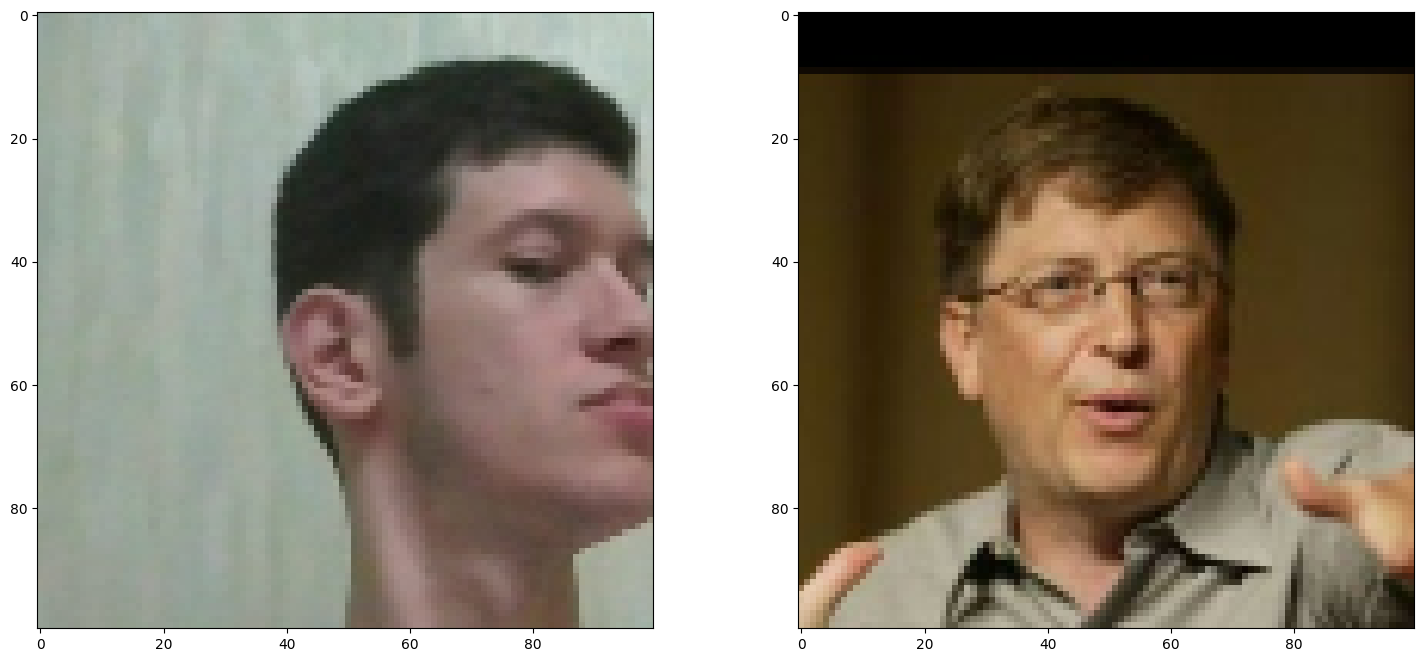

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.imshow(test_input[0])
plt.subplot(122)
plt.imshow(test_val[0])
plt.show()


# 7. Save Model

In [ ]:
# Save weights
siamese_model.save('siamesemodel.h5')

In [ ]:
# Reload model
model = tf.keras.models.load_model('siamesemodel.h5',
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy': tf.losses.BinaryCrossentropy})

In [ ]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

array([[3.3380758e-08],
       [4.8123657e-06],
       [2.0364928e-08],
       [9.9999082e-01],
       [5.8195115e-09],
       [9.9982250e-01],
       [9.9999249e-01],
       [9.9998844e-01],
       [1.0000000e+00],
       [3.8912749e-06],
       [9.9999630e-01],
       [7.8019822e-09],
       [9.9999070e-01],
       [1.7739539e-09],
       [1.0000000e+00],
       [3.1575826e-08]], dtype=float32)

In [ ]:
# Check if summary is same
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 8. Real Time Test

In [ ]:
os.mkdir('/content/application_data')
os.mkdir('/content/application_data/verification_images')
os.mkdir('/content/application_data/input_image')

## 8.1 Verification Function

In [ ]:
def verify(model, detection_treshold, verification_treshold):
  # Build results array
  results = []
  for image in os.listdir(os.path.join('application_data', 'verifiation_images')):
    input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
    validation_img = preprocess(os.path.join('application_data', 'verifiation_images', image))

    result = model.predictlist(np.expand_dims([input_img, validation_img], axis=1))
    results.append(result)

  # Detection Treshold : Metric above which a prediction is considered positive
  detection = np.sum(np.array(results) > detection_treshold)

  # Verification Treshold : Proportion of positive predictions / total positive samples
  verification = verification / len(os.listdir(os.path.join('application_data', 'verification_images')))
  verified = verification > verification_treshold

  return results, verified


## 8.2 OpenCV Real Time Verification

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
  ret, frame = cap.read()
  frame = frame[120:120+250, 200:200+250, :]

  cv2.imshow('Verification', frame)

  # Verification trigger
  if cv2.waitKey(10) & 0xFF ==ord('v'):
    # Save input image to application_data/input_image folder
    cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
    # Run verification
    results, verified = verify(model, 0.5, 0.5)
    print(verified)


  if cv2.waitKey(10) & 0xFF ==ord('q'):
    break

cap.release()
cv2.destroyAllWindows()